### 데이터 이해
- 1912년 4월 15일, 타이타닉호는 첫 항해에서 빙하와 2224명의 승객 중 11502명의 사상자(전체의 32% 생존)가 발생했다.
- 많은 사망자가 발생한 주요 원인 중 하나는 구명보트의 수가 충분하지 않았기 때문이다.
- 사망자들의 특징을 보면 특정 그룹이 다른 그룹들에 비해 더 살아남았다는 것을 확인할 수 있다.(ex. 여성, 어린이, 높은 사회계층의 사람들)

In [48]:
#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns #설치 필요, matplotlib가 없으면 설치가 불가하다.
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
#데이터 불러오기
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
combine=[train_df,test_df]

In [50]:
#데이터 확인1
print(train_df.columns.values)
train_df.head()
train_df.tail()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [51]:
#데이터 확인2
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [52]:
#데이터 확인3
train_df.describe()
train_df.describe(include=['O']) #영문 O를 넣으면 범주형 변수만 나온다.
# include에 all을 넣으면 숫자형과 범주형이 둘 다 나온다. 기본값은 숫자형 변수만 출력

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cook, Mr. Jacob",male,1601,G6,S
freq,1,577,7,4,644


### 변수 pivoting을 통한 분석
- 앞서 관찰한 내용 및 가정을 확인
- 변수간의 상관성 확인
- 범주형/순서형/이산형 값에 대한 분석 가능

In [53]:
#W는 한줄의 코드를 여러 라인으로 분리해서 쓰기 위한 값
train_df[['Pclass','Survived']].\
groupby(['Pclass']).\
mean().\
sort_values(by='Survived',ascending=False)
#groupby(['Pclass'],as_index=False).\ 로 바꾸면 인덱스도 나오게 된다.
#Pclass에 대한 살아남을 가능성이 나타나있다. chisqured 검정을 통해 검증을 해볼 수도 있다.
#.\ 값을 받아서 아래로 내려오고 또 거기서 처리해서 아래로 내려간다.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [54]:
train_df[["Sex","Survived"]].\
groupby(['Sex'],as_index=False).\
mean().\
sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [55]:
train_df[["SibSp","Survived"]].\
groupby(["SibSp"],as_index=False).\
mean().\
sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
train_df[["Parch","Survived"]].\
groupby(['Parch'],as_index=False).\
mean().\
sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 시각화를 통한 분석
- 숫자형 변수와 타겟 변수 간의 관계 확인

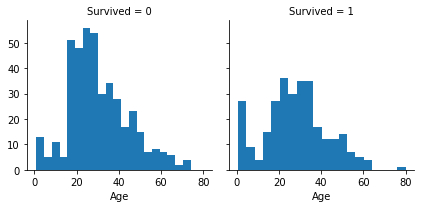

In [58]:
g=sns.FacetGrid(train_df,col='Survived') #Survived를 기준으로(Survived별로) 데이터를 나눠준다. (데이터,칼럼명)
g.map(plt.hist,'Age',bins=20) #map은 그래프를 그려주는 함수이다. 히스토그램을, 'Age'의 변수를 x축으로, bins는 기둥의 수이다.

### 숫자형 / 순서형 변수 간의 상관관계 확인

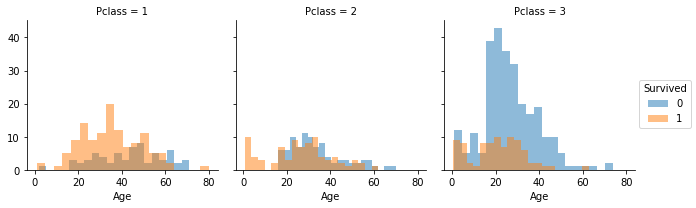

In [59]:
grid=sns.FacetGrid(train_df,col='Pclass',hue='Survived')
#grid=sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=1.6) #hue는 색깔로 데이터를 나타내준다.(색인)
#틀을 정의한다. Survived별로 나눠주고 Pclass가 3등급까지 있으므로 총 6개의 그래프의 공간을 생성한다. size,aspect는 사이즈
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend() #add_legend를 하게 되면 옆에 색인이 생기게 된다.

### 범주형 변수의 연관성 확인

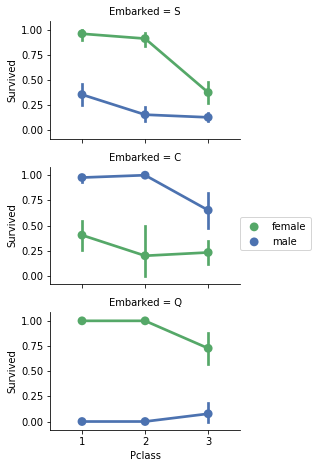

In [60]:
#grid=sns.FacetGrid(train_df,col='Embarked')
grid=sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6) #row와 col은 horizontal, vertical의 의미이다.
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
#Embarked 기준으로 데이터를 나누었으며, Pclass는 x축, Survived는 y축 그리고 Sex별로 나타내었다.
grid.add_legend()

### 범주형, 숫자형 변수의 상관관계 확인

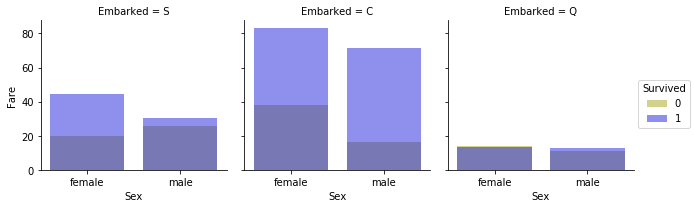

In [61]:
grid=sns.FacetGrid(train_df,col='Embarked',hue='Survived',palette={0:'y',1:'b'})
#팔레트를 이런식으로 키값을 주어 사용할 수 있다. hue값을 주면 누적그래프가 된다.
#grid=sns.FacetGrid(train_df,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=0.5,ci=None)
grid.add_legend()

### 데이터 전처리

#### 변수 제거
 - 결측값이 많았던 변수 제거 : ticket / cabin

In [62]:
'''
전처리 단계에서 train set을 처리하는 이유는?
이 부분은 데이터의 모양을 부분이라 train data를 가지고 모델을 만들었을 때 test에 적용 못할 수 있기에
'''
print("Before",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

train_df=train_df.drop(['Ticket','Cabin'],axis=1) #train_df에 Ticket과 Cabin 열을 제거
test_df=test_df.drop(['Ticket','Cabin'],axis=1) #test_df에 Ticket과 Cabin 열을 제거
combine = [train_df,test_df]

#"After",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


### 파생변수 생성
 - 정규표현식을 활용하여 이름에서 분석에 화룡ㅇ가능한 Keyword(title) 추출
 - title ex) Mr, Mrs, Ms, Dr, Prof
 - .(온점)으로 끝나는 단어 추출

In [63]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.\
    extract('([A-Za-z]+)\.',expand=False) #정규표현식을 활용하여 dataset의 Name의 데이터를 추출
#A-Z 또는 a-z 가 한개 이상(+) 나오는 패턴들, 그 다음 .을 적기위해 escape code인 (\.)을 사용한다.

    
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [64]:
for dataset in combine:
    #많이 나오는 title 외의 title은 rare로 묶음
    dataset['Title']=dataset['Title'].\
    replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    #동일한 의미를 가지는 다른 title을 major 이름으로 변경
    #Mlle -> Mlss
    #Ms -> Miss
    #Mme ->Mrs
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()
#master 8살 미만의 소년

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [65]:
#범주형을 순서형 데이터로 변경 : 생존률을 바탕으로 지정
title_mapping={"Mr":1,"Miss":4,"Mrs":5,"Master":3,"Rare":2,}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
    
#train_df.head()
"""
Title과 같은 파생변수를 만들어서 모델이 향상이 되는지 확인한다. 
모델을 만들면서 파생변수를 만들거나 하는 과정을 거친다. 파생변수는 모델의 성능을 높이는데 사용된다.
"""

'\nTitle과 같은 파생변수를 만들어서 모델이 향상이 되는지 확인한다. \n모델을 만들면서 파생변수를 만들거나 하는 과정을 거친다. 파생변수는 모델의 성능을 높이는데 사용된다.\n'

In [66]:
#PassengerId 변수 제거
train_df=train_df.drop(['Name','PassengerId'],axis=1)
test_df=test_df.drop(['Name'],axis=1)
#test_df에서 PassengerId를 지우는 순간 고유의 값을 테스트할 수 없게 된다.
combine=[train_df,test_df]
train_df.shape,test_df.shape
#test_df에는 Survived 칼럼이 없다. 왜냐하면 Survived 칼럼, 즉 y값(targer)변수를 예측해야하기 때문이다.

((891, 9), (418, 9))

### 범주형 변수 변형

In [67]:
#sex
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map({'female':1,'male':0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,5
2,1,3,1,26.0,0,0,7.9250,S,4
3,1,1,1,35.0,1,0,53.1000,S,5
4,0,3,0,35.0,0,0,8.0500,S,1


### 숫자형 연속형 변수 결측값 처리
 - 상관성이 있는 다른 변수들의 조합 내 데이터의 중앙값을 활용

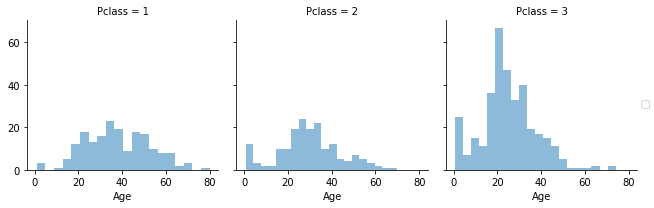

In [68]:
grid=sns.FacetGrid(train_df,col='Pclass')
# grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [69]:
#Pclass X Gender 별 나이 추정값을 저장하기 위한 행렬 생성
guess_ages=np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [70]:
guess_df = train_df[(train_df['Sex'] == 0) & \
                                  (train_df['Pclass'] == 1)]['Age'].dropna()
guess_df.head()

6     54.0
23    28.0
27    19.0
30    40.0
34    28.0
Name: Age, dtype: float64

In [71]:
#combine은 train_df 와 test_df 를 모두 담고 있는 dataset이다. 한꺼번에 변수들을 처리할 수 있기 때문에 이렇게 사용한다.
for dataset in combine: #
    for i in range(0,2): #Sex는 0과 1이 값으로 주어져있으므로 range는 0,2 (마지막값은 제외됨)
        for j in range(0,3): #Pclass는 1,2,3 값이므로 j+1 로 연산
            guess_df=dataset[(dataset['Sex']==i)&\
                            (dataset['Pclass']==j+1)]['Age'].dropna()
            #Sex가 i이고 Pclass가 j+1인경우 Age칼럼의 값에 na값을 제거한 것을 guess_df에 넣어줌
            #2*3이므로 총 6개의 값이 들어온다. 그것의 중앙값을 guess_ages[i,j]에 넣어준다.
            
            guess_ages[i,j]=guess_df.median()
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex==i)&(dataset.Pclass==j+1),'Age']=guess_ages[i,j]
            #Age가 null값이며 Sex의 값이 i이고 Pclass가 j+1인경우 Age칼럼에 예측값(guess_ages)을 넣어준다.
            
    dataset['Age']=dataset['Age'].astype(int) #int값으로 형변환 해준다.
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,5
2,1,3,1,26,0,0,7.9250,S,4
3,1,1,1,35,1,0,53.1000,S,5
4,0,3,0,35,0,0,8.0500,S,1


In [72]:
#나이대(5단위) 변수 생성 후 y와의(Survived) 상관관계 계산
train_df['AgeBand']=pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].\
groupby(['AgeBand'],as_index=False).\
mean().\
sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [73]:
#나이대와 y간의 연관성을 기준으로 순서형 변수로 변환
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=5
    dataset.loc[(dataset['Age']>16)&\
               (dataset['Age']<=32),'Age']=2
    dataset.loc[(dataset['Age']>32)&\
               (dataset['Age']<=48),'Age']=3
    dataset.loc[(dataset['Age']>48)&\
               (dataset['Age']<=64),'Age']=4
    dataset.loc[dataset['Age']>64,'Age']=1
train_df.head()
"""
dataset.loc[(dataset['Age']<=16,'Age')]=5 의 의미는 dataset에서 Age 칼럼의 값이 16보다 작을 경우
Age 칼럼에 5의 값을 부여하라 라는 의미이다. 나이대를 5단위로 pd.cut을 해서 Survived와의 상관관계를
계산했을 때의 Survived 순위대로 5~1의 값을 넣어준다.
"""

"\ndataset.loc[(dataset['Age']<=16,'Age')]=5 의 의미는 dataset에서 Age 칼럼의 값이 16보다 작을 경우\nAge 칼럼에 5의 값을 부여하라 라는 의미이다. 나이대를 5단위로 pd.cut을 해서 Survived와의 상관관계를\n계산했을 때의 Survived 순위대로 5~1의 값을 넣어준다.\n"

In [74]:
# AgeBand 변수 제거
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,7.2500,S,1
1,1,1,1,3,1,0,71.2833,C,5
2,1,3,1,2,0,0,7.9250,S,4
3,1,1,1,3,1,0,53.1000,S,5
4,0,3,0,3,0,0,8.0500,S,1


### 기존 변수 간의 조합으로 파생변수 생성
 - (SibSp)형제자매/배우자, (Parch)부모/자녀 변수의 합을 (FamilySize)가 가족크기라는 변수로 생성
 - IsAlone 변수 생성

In [75]:
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
    
train_df[['FamilySize','Survived']].\
groupby(['FamilySize'],as_index=False).\
mean().\
sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [76]:
#혼자인지 여부에 대한 벼수 생성
for dataset in combine:
    dataset['IsAlone']=0
    #isAlone 이라는 칼럼을 만든다.
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
    #FamilySize가 1이면 IsAlone에 1을 대입해준다.
    
train_df[['IsAlone','Survived']].\
groupby(['IsAlone'],as_index=False).\
mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [77]:
#Parch,SibSp,FamilySize 변수 제거
train_df=train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df=test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine=[train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,2,7.2500,S,1,0
1,1,1,1,3,71.2833,C,5,0
2,1,3,1,2,7.9250,S,4,1
3,1,1,1,3,53.1000,S,5,0
4,0,3,0,3,8.0500,S,1,1


In [78]:
#Pclass & Age를 조합한 새로운 변수 생성
for dataset in combine:
    dataset['Age*Class']=dataset.Age*dataset.Pclass
    
train_df.loc[:,['Age*Class','Age','Pclass']].head(10)
#loc : 전체 칼럼을 대상으로 해당되는 칼럼들(Age+Class ~ Pclass)를 불러와라(head)

,Age*Class,Age,Pclass
0,6,2,3
1,3,3,1
2,6,2,3
3,3,3,1
4,9,3,3
5,6,2,3
6,4,4,1
7,15,5,3
8,6,2,3
9,10,5,2


In [79]:
#두개의 결측값을 최빈값으로 대체
freq_port=train_df.Embarked.dropna().mode()[0] #mode()[0]을 하게되면 String값으로 받아오게 된다.
#mode()함수를 쓰게 되면 최빈값이 pandas의 Series 형태로 한줄로 출력이 된다. 그렇기 때문에 mode()[0]를 쓴다.
freq_port

'S'

In [80]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked','Survived']].\
groupby(['Embarked'],as_index=False).\
mean().\
sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [81]:
type(freq_port)

str

In [82]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].\
    map({'S':0,'C':2,'Q':1}).astype(int)
    #map
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,2,7.2500,0,1,0,6
1,1,1,1,3,71.2833,2,5,0,3
2,1,3,1,2,7.9250,0,4,1,6
3,1,1,1,3,53.1000,0,5,0,3
4,0,3,0,3,8.0500,0,1,1,9


In [83]:
#요금 변수의 결측치(한개 존재)를 중앙값으로 대체
test_df['Fare'].\
fillna(test_df['Fare'].\
      dropna().median(),inplace=True) 
#inplace는 연속된 연산 자체를 그 칼럼에 반영할지를 결정하는 인자이다. True면 칼럼에 반영, False이면 출력되기만 한다.
test_df.info()
"""
info() 와 describe() 와 head() 의 차이
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
Fare           418 non-null float64
Embarked       418 non-null int32
Title          418 non-null int64
IsAlone        418 non-null int64
Age*Class      418 non-null int64
dtypes: float64(1), int32(3), int64(5)
memory usage: 24.5 KB


'\ninfo() 와 describe() 와 head() 의 차이\n'

### 숫자형 변수를 이산화하여 범주형 변수 생성
 - 요금대 변수 생성

In [84]:
train_df['FareBand']=pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].\
groupby(['FareBand'],as_index=False).\
mean().\
sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [85]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,2,0,0,1,0,6
1,1,1,1,3,3,2,5,0,3
2,1,3,1,2,1,0,4,1,6
3,1,1,1,3,3,0,5,0,3
4,0,3,0,3,1,0,1,1,9
5,0,3,0,2,1,1,1,1,6
6,0,1,0,4,3,0,1,1,4
7,0,3,0,5,2,0,3,0,15
8,1,3,1,2,1,0,5,0,6
9,1,2,1,5,2,2,5,0,10


### 모델링, 예측

In [87]:
X_train=train_df.drop("Survived",axis=1)
Y_train=train_df["Survived"]
X_test=test_df.drop("PassengerId",axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

### Logistic Regression

In [88]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,3,0,1,1,1,9
1,3,1,3,0,0,5,0,9
2,2,0,4,1,1,1,1,8
3,3,0,2,1,0,1,1,6
4,3,1,2,1,0,5,0,6
5,3,0,5,1,0,1,1,15
6,3,1,2,0,1,4,1,6
7,2,0,2,2,0,1,0,4
8,3,1,2,0,2,5,1,6
9,3,0,2,2,0,1,0,6


In [89]:
logreg=LogisticRegression() #scikit-learn의 함수
logreg.fit(X_train,Y_train) #X_train과 Y_train의 값을 이용하여 훈련한다.
Y_pred=logreg.predict(X_test) #X_test값을 가지고 성능을 테스트한다, 예측을 할뿐이지 평가나 훈련은 이루어지지않는다.
"""
원래는 X와 Y의 train데이터를 가지고 fit을 수행한 후 모델을 만들었다.
그 후에 test 데이터를 가지고 모델을 성능 테스트 한 후 test의 실제 y값과 예측한 y값을 비교한다.
그렇게 해서 예측률을 구할 수 있다.
"""
acc_log=round(logreg.score(X_train,Y_train)*100,2)
acc_log

81.819999999999993

In [95]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns

RangeIndex(start=0, stop=1, step=1)

In [100]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'IsAlone', 'Age*Class'],
      dtype='object')

In [90]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
"""
train_df.columns를 하면 train_df의 칼럼명들이 리스트 형태로 반환이 된다.
그 다음 .delete(0)을 하면 0번째 인덱스의 칼럼명이 지워진다.
거기에 ['Feature']을 넣으면 칼럼명이 바뀌게 된다.
거기에 coeff_df["Correlation"]을 만들어주고 Series 객체의 logreg.coef_[0]을 넣어준다.
Correlation값들은 기울기를 나타내며 기울기가 높을수록 y값과 높은 영향력을 가진다.
"""
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,Title,0.897331
4,Embarked,0.318978
6,IsAlone,0.206506
2,Age,0.109624
7,Age*Class,-0.008147
1,Sex,-0.019943
3,Fare,-0.155525
0,Pclass,-1.056185


In [91]:
# Support Vector Machines(Classification)
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_val, y_val) * 100, 2)
acc_svc

array([-1.05618534, -0.01994338,  0.10962416, -0.15552473,  0.31897768,
        0.8973307 ,  0.20650555, -0.0081474 ])

In [14]:
# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_val, y_val) * 100, 2)
acc_knn


NameError: name 'logreg' is not defined

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_val, y_val) * 100, 2)
acc_gaussian

In [ ]:
# Perceptron

# perceptron = Perceptron()
perceptron = Perceptron(tol=1e-7)
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_val, y_val) * 100, 2)
acc_perceptron

In [ ]:
# Linear SVC
# 일반적으로 말하는 SVM과는 (유사하지만) 다른 알고리즘임
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_val, y_val) * 100, 2)
acc_linear_svc

In [ ]:
# Stochastic Gradient Descent

# sgd = SGDClassifier()
sgd = SGDClassifier(tol=1e-3)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_val, y_val) * 100, 2)
acc_sgd

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_val, y_val) * 100, 2)
acc_decision_tree

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_val, y_val) * 100, 2)
acc_random_forest

### Model Evaluation

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('data/titanic/submission.csv', index=False)